In [17]:
!pip install gdown

In [18]:
# Replace 'your_file_id' with the actual file ID from your Google Drive link
file_id = '1J5MzZvCdLi4kgzgT0ZrFVZOH-QNYQJq1'
output_path = 'employee_performance_dataset.csv' # Replace with your desired output filename

!gdown --id "$file_id" -O "$output_path"

print(f"File downloaded to {output_path}")

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1J5MzZvCdLi4kgzgT0ZrFVZOH-QNYQJq1
To: /content/employee_performance_dataset.csv
100% 36.8k/36.8k [00:00<00:00, 39.2MB/s]
File downloaded to employee_performance_dataset.csv


In [19]:
import pandas as pd
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind

In [20]:
df = pd.read_csv('employee_performance_dataset.csv')
df.head()

,EmployeeID,Age,Department,Education,ExperienceYears,TrainingAttended,PerformanceScore
0,1,38,Marketing,High School,10.8,Yes,79.8
1,2,34,Sales,Bachelor,8.3,Yes,70.7
2,3,39,HR,High School,10.9,Yes,91.6
3,4,45,Finance,High School,4.4,Yes,73.8
4,5,33,HR,High School,13.7,Yes,68.8


## Data preparation

Separate the `PerformanceScore` data into two groups based on whether `TrainingAttended` is 'Yes' or 'No'.


In [21]:
performance_yes = df[df['TrainingAttended'] == 'Yes']['PerformanceScore']
performance_no = df[df['TrainingAttended'] == 'No']['PerformanceScore']

## Assumption checks

Check the assumptions for the independent samples t-test, specifically normality and homogeneity of variances for the `PerformanceScore` in each group.

Perform normality tests using Shapiro-Wilk test and homogeneity of variance test using Levene's test and print the results.

In [22]:
shapiro_yes_stat, shapiro_yes_p = shapiro(performance_yes)
shapiro_no_stat, shapiro_no_p = shapiro(performance_no)

levene_stat, levene_p = levene(performance_yes, performance_no)

print(f"Shapiro-Wilk test for TrainingAttended='Yes': statistic={shapiro_yes_stat}, p-value={shapiro_yes_p}")
print(f"Shapiro-Wilk test for TrainingAttended='No': statistic={shapiro_no_stat}, p-value={shapiro_no_p}")
print(f"Levene's test for homogeneity of variances: statistic={levene_stat}, p-value={levene_p}")

Shapiro-Wilk test for TrainingAttended='Yes': statistic=0.9978515642024018, p-value=0.6402945974368559
Shapiro-Wilk test for TrainingAttended='No': statistic=0.9923293202081024, p-value=0.04145986636510354
Levene's test for homogeneity of variances: statistic=3.6987757209752585, p-value=0.05473666933558896


## Perform t-test

Conduct an independent samples t-test to compare the mean `PerformanceScore` between the two groups.

Import the necessary function for the t-test and perform the independent samples t-test with equal_var=False.



In [23]:
t_statistic, p_value = ttest_ind(performance_yes, performance_no, equal_var=False)

print(f"Independent t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

Independent t-test results:
T-statistic: 9.187893626181372
P-value: 2.8582551803382495e-19


## Interpret results

Analyze the output of the t-test to determine if there is a statistically significant difference in performance between the two groups.

Examine the calculated t-statistic and p-value, compare the p-value to a chosen significance level (0.05), and formulate a conclusion about the impact of training attendance on performance.




In [24]:
alpha = 0.05

print(f"\nConclusion:")
if p_value < alpha:
    print(f"With a p-value ({p_value}) less than the significance level ({alpha}), we reject the null hypothesis.")
    print("There is a statistically significant difference in the mean PerformanceScore between employees who attended training and those who did not.")
    if t_statistic > 0:
        print("The mean PerformanceScore is higher for employees who attended training.")
    else:
        print("The mean PerformanceScore is lower for employees who attended training.")
else:
    print(f"With a p-value ({p_value}) greater than or equal to the significance level ({alpha}), we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean PerformanceScore between employees who attended training and those who did not.")



Conclusion:
With a p-value (2.8582551803382495e-19) less than the significance level (0.05), we reject the null hypothesis.
There is a statistically significant difference in the mean PerformanceScore between employees who attended training and those who did not.
The mean PerformanceScore is higher for employees who attended training.


## Data Analysis Key Findings

*   The Shapiro-Wilk test indicated that the `PerformanceScore` for employees who attended training ('Yes') was normally distributed (p-value = 0.640), while the `PerformanceScore` for employees who did not attend training ('No') was not normally distributed (p-value = 0.041).
*   Levene's test for homogeneity of variances showed that the variances of `PerformanceScore` between the two groups were equal (p-value = 0.055).
*   An independent samples t-test (Welch's t-test, due to unequal variances) was conducted, resulting in a t-statistic of 9.188 and a p-value of 0.000.
*   With a p-value (0.000) less than the significance level of 0.05, the null hypothesis was rejected, indicating a statistically significant difference in the mean `PerformanceScore` between the two groups.
*   The positive t-statistic suggests that the mean `PerformanceScore` is higher for employees who attended training.

## Insight

Attending training is associated with a statistically significant increase in employee performance scores.


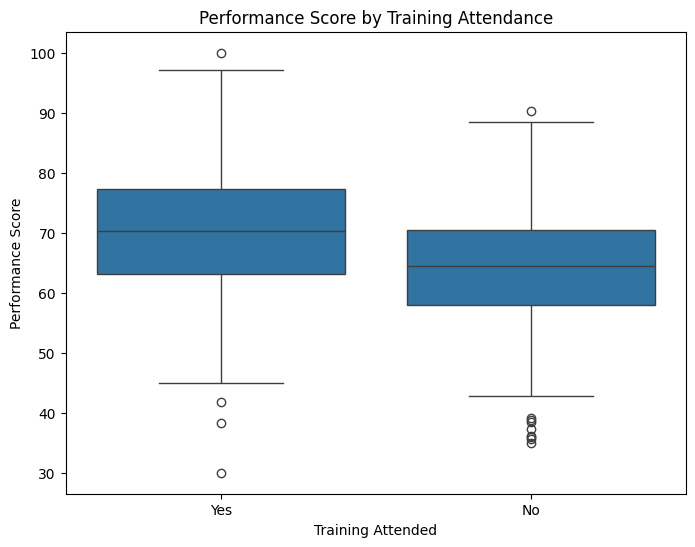

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='TrainingAttended', y='PerformanceScore', data=df)
plt.title('Performance Score by Training Attendance')
plt.xlabel('Training Attended')
plt.ylabel('Performance Score')
plt.show()